In [57]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
#importing the kaggle data
kaggle_spot_df = pd.read_csv("Resources/kaggle_spotify.csv")

kaggle_spot_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [59]:

#organizes columns in dataframe and eliminates songs before 1950
red_kaggle_spot_df=kaggle_spot_df[['id','name','artists','year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].loc[kaggle_spot_df['year']>=1950,:].reset_index(drop=True)

#agg mean of spotify metrics by year
annual_mean_metrics_df=red_kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').mean()

annual_mean_metrics_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
year,,,,,,,,,,
1950,0.866723,0.491433,0.324979,0.262045,0.212791,-13.506982,2.703500,0.118183,111.768489,0.551834
1951,0.904933,0.459766,0.250260,0.306456,0.215993,-15.948836,2.799000,0.107834,109.183712,0.431762
1952,0.861886,0.462659,0.251581,0.277559,0.227615,-16.055367,2.986500,0.164197,107.591128,0.436885
1953,0.891139,0.436234,0.265310,0.290270,0.225679,-15.551768,3.177436,0.096054,109.014178,0.423354
1954,0.867919,0.466630,0.259361,0.278372,0.219946,-15.594470,7.083500,0.115995,108.532237,0.446452
...,...,...,...,...,...,...,...,...,...,...
2016,0.280290,0.599976,0.592877,0.074646,0.180198,-7.949913,61.371254,0.107298,119.070344,0.430769
2017,0.289916,0.612286,0.586739,0.098209,0.194218,-8.422697,64.861500,0.111752,116.840278,0.414465
2018,0.271941,0.664930,0.590591,0.035948,0.171781,-7.253666,67.276000,0.128140,122.004325,0.447141


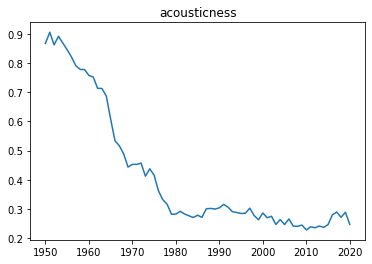

represents confidence the track is acoustic
------------------------
------------------------
------------------------


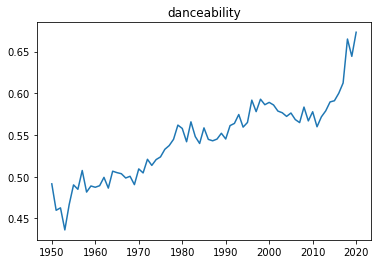

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
------------------------
------------------------
------------------------


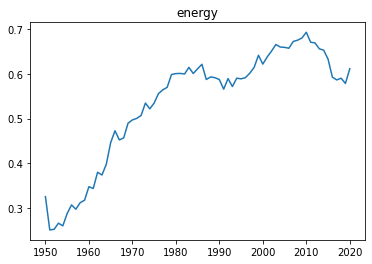

represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy
------------------------
------------------------
------------------------


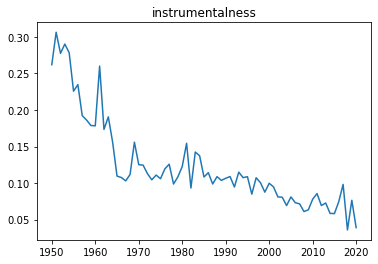

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly“vocal”
------------------------
------------------------
------------------------


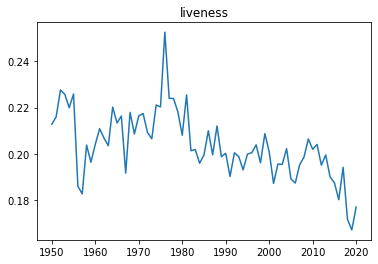

Detects the presence of an audience in the recording.
------------------------
------------------------
------------------------


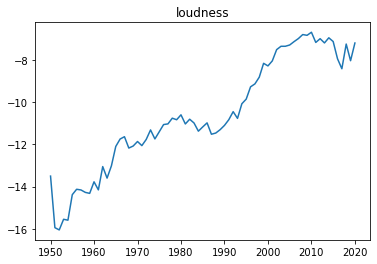

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
------------------------
------------------------
------------------------


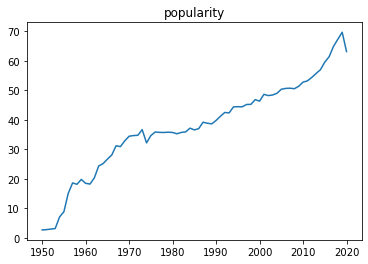

The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
------------------------
------------------------
------------------------


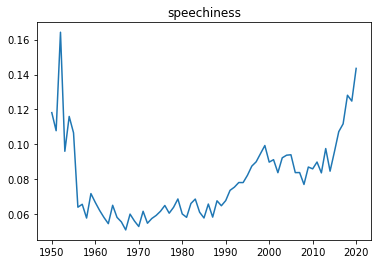

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry)
------------------------
------------------------
------------------------


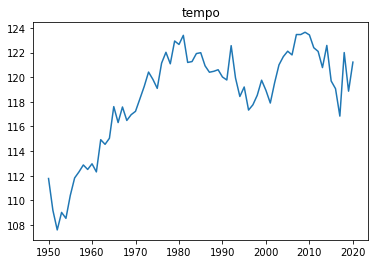

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
------------------------
------------------------
------------------------


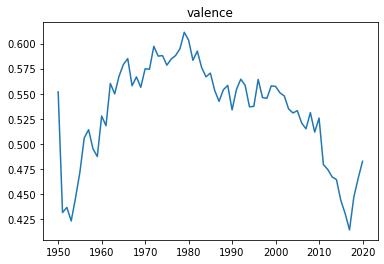

the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
------------------------
------------------------
------------------------


In [60]:
#turns the metric names into a list
spot_metric_names=annual_mean_metrics_df.columns.to_list()


### an explination of each metric
metric_descriptions_dict={
    spot_metric_names[0]:"represents confidence the track is acoustic",
    spot_metric_names[1]:'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.',
    spot_metric_names[2]:'represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy',
    spot_metric_names[3]:'Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly“vocal”',
    spot_metric_names[4]:'Detects the presence of an audience in the recording.',
    spot_metric_names[5]:'The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).',
    spot_metric_names[6]:'The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.',
    spot_metric_names[7]:'Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry)',
    spot_metric_names[8]:'The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.',
    spot_metric_names[9]:'the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).'}



#generates a plot and description for each metric
for metric in spot_metric_names:
    plt.plot(annual_mean_metrics_df.index,annual_mean_metrics_df[metric])
    plt.title(metric)
    plt.show()
    print(metric_descriptions_dict[metric])
    print("------------------------")
    print("------------------------")
    print("------------------------")

In [ ]:
##### I'm thinking it would be cool to look for outliers in each year for each spotify metric
##### also, i'm wondering if i could/should use all the song id's to request the # of plays for each song from spotify's API